# 01. Знакомство с `torch.Tensor`

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [10]:
import sympy
import torch
from scipy.spatial import distance
from torch.nn import functional as f

In [11]:
torch.manual_seed(0);

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [12]:
# ... в результате к XV веку сложились правила,
# которые сегодня известны как «классические» ...
t = torch.zeros(8, 8, dtype=torch.float)
pawns = torch.ones(8)
important = torch.tensor([4, 3, 2, 6, 5, 2, 3, 4])

t[0], t[1] = -1 * important, -1 * pawns
t[-1], t[-2] = important, pawns
t

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

In [13]:
# 1 операция, но вряд ли от меня этого хотели?

torch.tensor([
    [-4, -3, -2, -6, -5, -2, -3, -4],
    [-1, -1, -1, -1, -1, -1, -1, -1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [4, 3, 2, 6, 5, 2, 3, 4],
], dtype=torch.float16)

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]], dtype=torch.float16)

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [14]:
even = torch.arange(2, 21, step=2)
even * (even + 1)

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [15]:
# как решить без broadcasting?

torch.arange(1, 8) + torch.arange(0, 101, step=10).reshape(-1, 1)

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [16]:
def textural(n: int, m: int) -> torch.Tensor:
    pat = torch.tensor([
        [0, 1],
        [2, 3]
    ])
    return pat.repeat(((n + 1) // 2, ((m + 1) // 2)))[:n, :m]


textural(4, 5)

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

In [17]:
t: torch.Tensor = torch.empty(4, 7).uniform_(0, 20)  # noqa
t

tensor([[ 9.9251, 15.3644,  1.7695,  2.6406,  6.1485, 12.6816,  9.8019],
        [17.9289,  9.1126, 12.6461,  6.9779,  8.0343,  0.4465,  3.3772],
        [ 5.8778, 10.3704, 13.9534, 16.0002,  3.2206,  5.6454, 13.6322],
        [18.3039,  7.9420, 17.4831,  8.3882, 11.0581, 19.0548,  0.7233]])

In [18]:
min_, max_ = t.min(), t.max()
(t - min_) / (max_ - min_)

tensor([[0.5094, 0.8017, 0.0711, 0.1179, 0.3064, 0.6575, 0.5028],
        [0.9395, 0.4657, 0.6556, 0.3510, 0.4078, 0.0000, 0.1575],
        [0.2919, 0.5333, 0.7259, 0.8359, 0.1491, 0.2794, 0.7086],
        [0.9596, 0.4028, 0.9155, 0.4268, 0.5703, 1.0000, 0.0149]])

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в массивах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [19]:
ar1 = torch.randint(0, 11, (4, 7))
ar2 = torch.randint(0, 11, (4, 7))

ar1, ar2

(tensor([[ 9,  9,  0,  4,  8,  3,  9],
         [ 0,  3,  8,  1,  3,  8, 10],
         [ 9,  7,  9,  7, 10,  4,  8],
         [10,  3,  7,  8, 10,  7,  9]]),
 tensor([[ 3,  5, 10,  8,  5, 10,  3],
         [ 3, 10,  3, 10,  4,  2,  8],
         [ 5, 10,  3,  6,  9,  2, 10],
         [ 4,  4, 10,  7,  7,  1,  2]]))

In [20]:
torch.max(ar1, ar2)

tensor([[ 9,  9, 10,  8,  8, 10,  9],
        [ 3, 10,  8, 10,  4,  8, 10],
        [ 9, 10,  9,  7, 10,  4, 10],
        [10,  4, 10,  8, 10,  7,  9]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [21]:
# второй максимум строго меньше первого
t = torch.randint(low=0, high=101, size=(20,))
v = t.unique(sorted=True)[-2]
i = (t == v).nonzero(as_tuple=True)[-1]
print(t)
print(f'{v=}, {i=}')

tensor([ 1, 23, 56, 57, 46, 72, 43, 51, 24, 42, 18, 17, 36, 84, 85, 65, 13, 27,
        78, 74])
v=tensor(84), i=tensor([13])


## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [22]:
torch.arange(1, 8) + torch.arange(0, 101, step=10).reshape(-1, 1)

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [23]:
a_2d = torch.tensor([
    [3, 3, 3],
    [4, 4, 4],
    [5, 5, 5],
])
b_1d = torch.tensor([1, 2, 3])

a_2d - b_1d.reshape(-1, 1)

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
array([1, 3, 5, 7])
```

In [24]:
a = torch.tensor([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])
b = torch.tensor([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])

(a == b).nonzero(as_tuple=True)[0]  # noqa

tensor([1, 3, 5, 7])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [25]:
torch.arange(9).view(3, 3).flip([0, 1])

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

Ожидается резульат:

```python
array([6, 9, 10])
```

In [26]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
a[(a >= 5) & (a <= 10)]

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `np.arange(9).reshape(3,3)`

In [27]:
t = torch.arange(9).reshape(3, 3)
t[:, [0, 1]] = t[:, [1, 0]]
t

tensor([[1, 0, 2],
        [4, 3, 5],
        [7, 6, 8]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [28]:
t = torch.randint(0, 11, size=(8, 10))
t

tensor([[ 8,  0,  3,  5,  9,  1,  3,  4,  3,  1],
        [ 0,  8,  5,  3,  2,  3,  0,  8,  7,  2],
        [ 2,  0, 10,  2,  3,  1,  8,  4, 10, 10],
        [ 0,  5,  4,  2,  9,  1,  6,  7,  3,  3],
        [ 8,  5,  6,  5,  8,  1,  9,  9,  0,  2],
        [ 7,  1,  5,  4,  8,  0,  0, 10,  2,  2],
        [ 7,  9,  9,  3,  5,  4,  1,  1,  0,  9],
        [ 3,  0,  7,  1,  7,  0,  4, 10,  9,  3]])

In [29]:
i = t.sum(1).argmin()
row = t[i]
print(f'{row=}, {i=}')

row=tensor([8, 0, 3, 5, 9, 1, 3, 4, 3, 1]), i=tensor(0)


1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [30]:
t = torch.randint(0, 101, size=(20,))
t

tensor([ 79,  50,  84,  14,  68, 100,   7,  18,  39,  78,  10,  86,  11, 100,
         70,  32,   8,  21,  61,  81])

In [31]:
t.clamp(min=30, max=70)

tensor([70, 50, 70, 30, 68, 70, 30, 30, 39, 70, 30, 70, 30, 70, 70, 32, 30, 30,
        61, 70])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [32]:
a = torch.randint(0, 11, size=(30, 3))
b = torch.randint(0, 11, size=(30, 3))
a, b

(tensor([[ 3,  7,  3],
         [ 9,  6,  6],
         [ 8,  6,  1],
         [ 0,  8,  4],
         [ 5,  4,  8],
         [ 8,  1,  8],
         [ 6, 10,  8],
         [ 5,  5,  8],
         [ 3, 10,  2],
         [ 8,  2,  4],
         [ 4,  3,  6],
         [ 6,  9,  1],
         [ 6,  6,  7],
         [ 4,  5,  4],
         [ 9,  0,  4],
         [ 7,  0,  5],
         [ 4,  2,  2],
         [ 6,  1,  3],
         [10,  1,  2],
         [ 5,  6,  3],
         [ 1,  7, 10],
         [ 3, 10,  9],
         [ 4,  5,  2],
         [ 8,  5,  1],
         [ 9,  6,  1],
         [ 4,  0,  0],
         [ 8,  3,  1],
         [ 1,  7, 10],
         [ 8,  3,  0],
         [ 9,  5,  8]]),
 tensor([[ 0,  9,  0],
         [10,  9,  3],
         [ 6,  2,  4],
         [ 8,  6,  9],
         [ 0,  8,  9],
         [ 0,  8,  2],
         [ 5, 10,  5],
         [ 2,  9,  0],
         [ 1,  9,  9],
         [ 4,  7,  9],
         [ 4,  2,  5],
         [ 9,  3,  9],
         [10,  1,  6],
         

In [33]:
a[a > b].sum()

tensor(270)

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [34]:
t = torch.randint(0, 11, size=(20, 20))
t

tensor([[ 8,  7,  0,  1,  4,  9,  4,  2,  6, 10,  7,  3,  8,  5,  9,  4,  4,  2,
         10,  5],
        [ 9,  8,  3,  5,  5,  3,  1,  7,  6,  2,  4,  1,  8,  6,  2,  2,  7,  1,
          3,  8],
        [ 2,  0,  6,  1,  3,  1,  1,  2,  4,  5,  3,  4,  6,  2,  0,  2, 10,  7,
          4,  5],
        [ 0,  8,  8,  1, 10,  2,  1,  9,  1,  9,  7,  3,  3, 10,  3,  9,  8,  9,
          0,  2],
        [ 6,  6,  9,  0,  5,  5,  7, 10,  5,  9,  8,  5,  8,  7,  3,  3,  9,  1,
          6,  0],
        [ 5, 10,  1,  2,  2,  2,  1,  5,  7,  1,  6,  8,  7,  8,  8, 10,  6,  4,
          2,  4],
        [ 2,  7,  4,  8,  3,  5,  9,  1,  8,  5,  5,  4,  5,  5,  8,  7,  8,  0,
          4,  5],
        [ 4,  4,  9, 10,  3, 10,  4,  2,  2,  1, 10,  9,  1,  3,  5,  9,  6,  1,
          1,  9],
        [ 1,  5,  0,  4,  0,  5,  7,  3,  1,  1,  9,  0,  8,  9,  6,  5,  7,  9,
          6,  2],
        [10,  5,  6,  9,  7,  8,  8,  3, 10,  8,  4,  0,  6,  2,  6,  7,  9,  1,
          3,  6],
        [ 

In [35]:
t[torch.arange(0, t.shape[0] - 1), torch.arange(1, t.shape[0])]

tensor([ 7,  3,  1, 10,  5,  1,  1,  2,  1,  4, 10, 10,  5,  6,  1,  8,  8,  6,
        10])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [36]:
ar1 = torch.randint(0, 11, size=(5, 10))
ar2 = torch.randint(0, 11, size=(5, 10))

ar1, ar2

(tensor([[ 2,  0,  5,  5,  8, 10,  5,  3,  1,  5],
         [ 0,  4,  4,  4,  4,  1,  6,  4,  6,  0],
         [ 6,  2,  1,  3, 10,  7,  9,  5, 10,  8],
         [ 4,  2, 10,  6,  3,  9,  5,  4,  8,  1],
         [ 1,  1,  1, 10,  9,  1,  7,  9,  5,  3]]),
 tensor([[ 3,  1,  8,  7,  5,  3,  9,  1,  9,  0],
         [ 3,  1, 10,  6,  5, 10,  1,  8,  3, 10],
         [ 0, 10,  0,  7,  0,  9,  1,  0,  3,  3],
         [ 9,  2,  1,  9,  4,  7,  9,  3,  1,  6],
         [ 2,  4,  6,  3,  3,  0,  6,  9,  8, 10]]))

In [37]:
ar1[ar1 == ar2] *= 2
ar1

tensor([[ 2,  0,  5,  5,  8, 10,  5,  3,  1,  5],
        [ 0,  4,  4,  4,  4,  1,  6,  4,  6,  0],
        [ 6,  2,  1,  3, 10,  7,  9,  5, 10,  8],
        [ 4,  4, 10,  6,  3,  9,  5,  4,  8,  1],
        [ 1,  1,  1, 10,  9,  1,  7, 18,  5,  3]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [38]:
ar1 = torch.randint(0, 11, size=(4, 7))
ar2 = torch.randint(0, 11, size=(4, 7))
ar3 = torch.randint(0, 11, size=(4, 7))

ar1, ar2, ar3

(tensor([[ 9,  5, 10,  4,  3,  2,  5],
         [ 7,  1,  1,  6,  3,  3, 10],
         [ 1,  6,  3,  4,  1,  7,  0],
         [10,  1,  5,  2,  2,  9,  8]]),
 tensor([[ 9,  7,  5,  2,  1,  8,  0],
         [ 6,  1,  7,  0,  9,  2,  2],
         [ 6,  5,  5,  9, 10,  2,  5],
         [ 8,  3,  7,  8, 10,  9,  4]]),
 tensor([[ 2,  3,  8,  8,  0,  5,  1],
         [ 4,  2,  8,  7,  8,  8,  9],
         [ 2,  6,  3,  0,  0,  0, 10],
         [ 6,  9,  0,  3,  8,  3, 10]]))

In [39]:
ar1[(ar1 > ar2) & (ar1 < ar3)] = 0
ar1

tensor([[ 9,  5, 10,  0,  3,  2,  5],
        [ 7,  1,  1,  0,  3,  0, 10],
        [ 1,  6,  3,  4,  1,  7,  0],
        [10,  1,  5,  2,  2,  9,  0]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [40]:
ar1 = torch.randint(0, 21, size=(20, 5))
ar1

tensor([[11, 18,  3, 13,  6],
        [18, 15,  2,  2,  2],
        [16, 17, 13,  1, 19],
        [11,  9, 12,  2,  4],
        [ 4,  0,  6, 17, 12],
        [ 5,  8,  4,  8, 16],
        [ 5,  4, 10,  5,  9],
        [ 0,  6, 19, 16,  2],
        [ 9, 13, 19, 10, 11],
        [ 1, 19, 12, 20, 19],
        [16,  9, 16, 15,  4],
        [ 5,  3,  3, 12,  2],
        [17,  4,  5,  9,  0],
        [ 2, 16, 19, 15, 12],
        [ 2, 17,  2,  5, 10],
        [13, 10,  0, 19, 12],
        [ 9,  3, 14,  3,  0],
        [16,  6, 13, 15,  5],
        [ 3, 17,  2,  1, 15],
        [16,  1,  4,  7,  3]])

In [41]:
row_max_indices = ar1.argmax(1)
rows, counts = row_max_indices.unique(return_counts=True)
rows[counts >= 5]

tensor([0, 2])

1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива.

In [42]:
ar1 = torch.rand(4, 7)
ar1, (ar1.max(), ar1.argmax())

(tensor([[0.6960, 0.8688, 0.6200, 0.4506, 0.7479, 0.1826, 0.9891],
         [0.0028, 0.0210, 0.3818, 0.9084, 0.5501, 0.6920, 0.1335],
         [0.6823, 0.4441, 0.7004, 0.8531, 0.7173, 0.4575, 0.4692],
         [0.1864, 0.3191, 0.8249, 0.2995, 0.8105, 0.3017, 0.3836]]),
 (tensor(0.9891), tensor(6)))

In [43]:
i = torch.div(ar1.argmax(), ar1.shape[1], rounding_mode='floor')
j = ar1.argmax() % ar1.shape[1]
ar1[i + 1:, j + 1:] = 0
ar1

tensor([[0.6960, 0.8688, 0.6200, 0.4506, 0.7479, 0.1826, 0.9891],
        [0.0028, 0.0210, 0.3818, 0.9084, 0.5501, 0.6920, 0.1335],
        [0.6823, 0.4441, 0.7004, 0.8531, 0.7173, 0.4575, 0.4692],
        [0.1864, 0.3191, 0.8249, 0.2995, 0.8105, 0.3017, 0.3836]])

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [44]:
t = torch.tensor([2, 3, 2, 2, 2, 1])
f.one_hot(t - 1).float()

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая.

In [45]:
arr = torch.randint(0, 101, size=(20,))
arr

tensor([57, 56, 43, 23, 12,  1, 81, 27, 64, 57, 81, 44, 87, 35, 74,  0, 61, 48,
        41, 79])

In [46]:
mode, _ = torch.mode(arr)
mode, (arr == mode).nonzero(as_tuple=True)[0]  # noqa

(tensor(57), tensor([0, 9]))

## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [47]:
x = torch.linspace(0, 10, 100)
y = x * torch.sin(x)

interval = x[y > 0.5]
interval[0], interval[-1]

(tensor(0.8081), tensor(9.2929))

In [48]:
# расчет без погрешности (почти)
x_ = torch.linspace(0, 10, 100_000)
y_ = x_ * torch.sin(x_)

interval_ = x_[y_ > 0.5]
interval_[0], interval_[-1]

(tensor(0.7409), tensor(9.3714))

In [49]:
# погрешность
torch.abs(interval[0] - interval_[0]) * 100 / 10, torch.abs(interval[-1] - interval_[-1]) * 100 / 10

(tensor(0.6717), tensor(0.7846))

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [50]:
n = torch.tensor(100)
nums = torch.arange(2, n + 1)

p = 2
sieve = torch.full(nums.size(), fill_value=True)
while p < torch.sqrt(n) + 1:
    sieve[2 * p - 2::p] = False
    p = nums[sieve & (nums > p)][0]

nums[sieve]

tensor([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61,
        67, 71, 73, 79, 83, 89, 97])

1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [51]:
def euclidean_dist(a, b):
    return torch.sqrt(torch.sum((a - b) ** 2, dim=0))

In [52]:
a = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float)
b = torch.tensor([6, 7, 8, 9, 10], dtype=torch.float)

print(f'euclidean_dist: {euclidean_dist(a, b)}\n'
      f'torch.linalg.norm: {torch.linalg.norm(a - b)}\n'
      f'scipy.distance.euclidean: {distance.euclidean(a, b)}')

euclidean_dist: 11.180339813232422
torch.linalg.norm: 11.180339813232422
scipy.distance.euclidean: 11.180339813232422


1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [53]:
t = torch.randint(0, 100, size=(20, 3))  # вектора с началом в (0, 0, 0)
t

tensor([[36, 52, 46],
        [93, 63, 80],
        [46, 79,  4],
        [76, 29, 56],
        [39, 35, 10],
        [84,  3,  1],
        [47, 68, 64],
        [17, 84, 60],
        [93, 91, 88],
        [46, 56, 64],
        [21, 69, 53],
        [13, 80, 90],
        [79, 98, 50],
        [89, 12, 36],
        [72, 47, 38],
        [43,  7, 78],
        [ 7,  5, 82],
        [66, 30, 98],
        [52, 15, 75],
        [15,  2, 51]])

In [54]:
t[(t ** 2).sum(1).argsort()]  # sqrt монотонно-возрастающая ф-ия, можно опустить

tensor([[15,  2, 51],
        [39, 35, 10],
        [36, 52, 46],
        [ 7,  5, 82],
        [84,  3,  1],
        [43,  7, 78],
        [21, 69, 53],
        [46, 79,  4],
        [52, 15, 75],
        [72, 47, 38],
        [46, 56, 64],
        [89, 12, 36],
        [76, 29, 56],
        [47, 68, 64],
        [17, 84, 60],
        [13, 80, 90],
        [66, 30, 98],
        [79, 98, 50],
        [93, 63, 80],
        [93, 91, 88]])

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [55]:
t = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])
right, left = torch.roll(t, -1), torch.roll(t, 1)

mask = (t > left) & (t > right)
mask[0], mask[-1] = t[0] > t[1], t[-1] > t[-2]  # края отдельно
indices = mask.nonzero(as_tuple=True)[0]

indices, t[indices]

(tensor([2, 5, 7]), tensor([7, 6, 1]))

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных чисел от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [56]:
t = torch.rand((100,))
target = 0.8
i = (t - target).abs().argmin()
i, t[i]

(tensor(15), tensor(0.7935))

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [57]:
A = torch.tensor([
    [-1, 2, 4],
    [-3, 1, 2],
    [-3, 0, 1],
], dtype=torch.float)
B = torch.tensor([
    [3, -1],
    [2, 1],
], dtype=torch.float)
C = torch.tensor([
    [7, 21],
    [11, 8],
    [8, 4],
], dtype=torch.float)

X = torch.matmul(torch.matmul(torch.inverse(A), -C), torch.inverse(B))
X

tensor([[ 1.0000e+00,  1.1921e-07],
        [-2.0000e+00,  1.0000e+00],
        [ 3.0000e+00, -4.0000e+00]])

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [58]:
a1 = torch.tensor([3, -3, 0, 7], dtype=torch.float)
a2 = torch.tensor([2, 2, 4, 7], dtype=torch.float)
a3 = torch.tensor([1, 2, 3, 4], dtype=torch.float)
a4 = torch.tensor([5, -4, 1, 3], dtype=torch.float)

m = torch.vstack([a1, a2, a3, a4])
print(f'Линейная независимость: {torch.linalg.matrix_rank(m) == m.shape[0]}')

Линейная независимость: False


In [59]:
# проверка

_, indices = sympy.Matrix(m).T.rref()
print(f'Линейная независимость: {indices == m.shape[0]}')

Линейная независимость: False


1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами.

In [60]:
t = torch.normal(mean=0, std=10, size=(200,))
torch.histogram(t, bins=20)

torch.return_types.histogram(
hist=tensor([ 1.,  2.,  0.,  3.,  3.,  4.,  4., 13., 15., 24., 26., 20., 23., 15.,
        13., 12.,  9.,  4.,  5.,  4.]),
bin_edges=tensor([-30.8757, -28.1671, -25.4585, -22.7500, -20.0414, -17.3328, -14.6242,
        -11.9156,  -9.2070,  -6.4985,  -3.7899,  -1.0813,   1.6273,   4.3359,
          7.0445,   9.7530,  12.4616,  15.1702,  17.8788,  20.5874,  23.2959]))

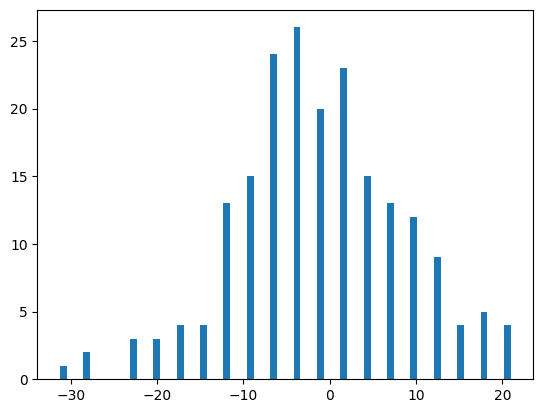

In [61]:
from matplotlib import pyplot as plt

height, x = torch.histogram(t, bins=20)
plt.bar(x[:-1], height);